In [2]:
import matplotlib.pyplot as plt
import gym
import numpy as np
from hiive.mdptoolbox import example, mdp

from tqdm import tqdm

In [5]:
import sys

SyntaxError: invalid syntax (<ipython-input-13-68dcfb427789>, line 1)

In [6]:
sys.executable

'/home/dheekshitha-vibha/miniconda3/envs/myenv/bin/python'

In [7]:
sys.path
# sys.executable

['/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python36.zip',
 '/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6',
 '/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/lib-dynload',
 '',
 '/home/dheekshitha-vibha/.local/lib/python3.6/site-packages',
 '/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages',
 '/home/dheekshitha-vibha/Desktop/CS7641/A4/ml-assignment4-master/src/toh-gym',
 '/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/dheekshitha-vibha/.ipython']

In [3]:
from toh_gym.envs import TohEnv

In [5]:
#P, R = example.forest(S=100, r1=10, r2=5, p=0.001)
# P, R = example.rand(10000, 4)
# from tgpsd.envs import TohEnv#here
# import tgpsd as tg

In [4]:
def getTransitionAndReward(env):
    nA, nS = env.nA, env.nS
    T = np.zeros([nA, nS, nS])
    R = np.zeros([nS, nA])
    for s in range(nS):
        for a in range(nA):
            transitions = env.P[s][a]
            for p_trans, next_s, reward, _ in transitions:
                T[a,s,next_s] += p_trans
                R[s,a] = reward
            T[a,s,:] /= np.sum(T[a,s,:])
    return T, R

In [5]:
def simulateGymEnv(env, policy, numEpisodes, max_iters=1000):
    rewards = []
    lengths = []
    failed = 0
    for i in range(numEpisodes):
        env.reset()
        state = 0
        done = False
        count = 0
        reward_sum = 0

        while not done:
            action = policy[state]
            state, reward, done, _ = env.step(action)
            reward_sum += reward
            count += 1
            
            if count > max_iters:
                failed += 1
                break
        
        lengths.append(count)
        rewards.append(reward_sum)
    return lengths, rewards

In [6]:
def plotStats(lengths, rewards):
    count = 0
    for i in rewards:
        if i == 1.0:
            count += 1
    print(count / len(rewards))
    
    # Total reward per episode and average reward per step for each episode
    _, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes[0][0].plot(x, rewards)
    axes[0][0].set_xlabel('Episode')
    axes[0][0].set_ylabel('Total Reward')
    axes[0][0].grid()

    avg_reward = [rewards[i] / lengths[i] for i in range(len(rewards))]
    axes[0][1].plot(x, avg_reward)
    axes[0][1].set_xlabel('Episode')
    axes[0][1].set_ylabel('Avg. Reward per Step')
    axes[0][1].grid()
    
    axes[1][0].plot(x, lengths)
    axes[1][0].set_xlabel('Episode')
    axes[1][0].set_ylabel('Steps')
    axes[1][0].grid()
    

In [7]:
# from tg_psd import TohEnv

In [8]:
env = TohEnv(poles=3, rings=6, noise=0.1)
T, R = getTransitionAndReward(env)#here

In [1]:
# env.action_list#here
T

NameError: name 'T' is not defined

In [8]:
# env.reset()
# env.render()#here

In [10]:
#try varying gammas from 0 to 1
#at 0 the agent only considers immediate rewards
#at 1 the agent considers all futures rewards equally
gammas = np.arange(0.95, 0.99, 0.01)
# print(gammas) #here

## Value Iteration

0.95 0.118 0.0005263157894736847
0.96 0.114 0.000416666666666667
0.97 0.128 0.0003092783505154642
0.98 0.128 0.0002040816326530614
0.99 0.146 0.00010101010101010109


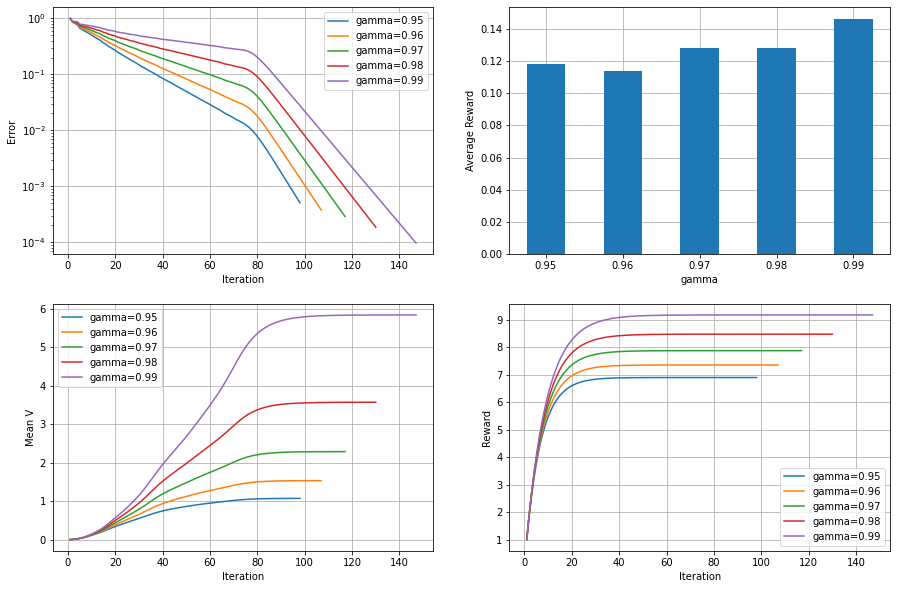

In [11]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))
avg_rewards = []
for gamma in gammas:
    vi = mdp.ValueIteration(T, R, gamma)
    vi.verbose = False
    vi.run()
    episodes = 500
    x = range(episodes)
    vi_lengths, vi_rewards = simulateGymEnv(env, vi.policy, episodes)
    print(gamma, sum(vi_rewards) / episodes, vi.thresh)
    avg_rewards.append(sum(vi_rewards) / episodes)
   
    # Policy change per iteration
    ax[0][0].semilogy(range(1, vi.iter + 1), [run['Error'] for run in vi.run_stats], label="gamma=%.2f" % gamma)
    ax[0][0].set_xlabel('Iteration')
    ax[0][0].set_ylabel('Error')
    ax[0][0].grid()
    ax[0][0].legend()
    
    ax[1][0].plot(range(1, vi.iter + 1), [run['Mean V'] for run in vi.run_stats], label="gamma=%.2f" % gamma)
    ax[1][0].set_xlabel('Iteration')
    ax[1][0].set_ylabel('Mean V')
    ax[1][0].grid()
    ax[1][0].legend()
    
    ax[1][1].plot(range(1, vi.iter + 1), [run['Reward'] for run in vi.run_stats], label="gamma=%.2f" % gamma)
    ax[1][1].set_xlabel('Iteration')
    ax[1][1].set_ylabel('Reward')
    ax[1][1].grid()
    ax[1][1].legend()

# Time
ax[0][1].bar(gammas, avg_rewards, width=0.005)
ax[0][1].set_xlabel('gamma')
ax[0][1].set_ylabel('Average Reward')
ax[0][1].set_axisbelow(True)
ax[0][1].grid()

plt.show()

In [12]:
vi = mdp.ValueIteration(T, R, 0.99, epsilon=0.01)
vi.run()
print(vi.iter, vi.time)
print(vi.policy)

147 0.11812615394592285
(0, 1, 5, 3, 4, 1, 0, 3, 2, 4, 3, 5, 2, 1, 2, 0, 3, 0, 4, 1, 5, 1, 0, 4, 5, 5, 2, 3, 4, 1, 2, 5, 2, 0, 4, 0, 3, 4, 5, 3, 2, 4, 5, 1, 0, 4, 0, 3, 0, 5, 2, 1, 5, 1, 2, 1, 5, 0, 3, 3, 4, 0, 4, 3, 4, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 3, 2, 1, 2, 3, 2, 4, 3, 5, 2, 1, 2, 0, 3, 0, 4, 4, 5, 1, 0, 4, 5, 3, 2, 3, 0, 4, 0, 1, 2, 1, 5, 5, 2, 1, 5, 0, 4, 3, 4, 0, 3, 3, 4, 4, 5, 5, 2, 1, 2, 3, 2, 1, 5, 1, 0, 1, 2, 3, 2, 0, 3, 0, 4, 1, 5, 1, 2, 1, 5, 5, 2, 3, 4, 0, 4, 3, 4, 0, 3, 1, 0, 3, 2, 4, 5, 3, 2, 1, 0, 3, 2, 4, 5, 1, 0, 4, 3, 4, 0, 4, 3, 3, 0, 5, 2, 1, 2, 5, 2, 1, 5, 5, 2, 1, 2, 1, 2, 1, 5, 0, 3, 0, 4, 0, 3, 3, 4, 0, 3, 0, 4, 0, 4, 3, 4, 1, 5, 1, 0, 4, 5, 5, 2, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 1, 0, 4, 5, 5, 2, 4, 5, 5, 2, 1, 2, 3, 2, 3, 2, 1, 2, 5, 2, 0, 4, 0, 3, 4, 5, 3, 2, 4, 5, 1, 0, 4, 0, 3, 0, 5, 2, 1, 5, 1, 2, 1, 5, 0, 3, 3, 4, 0, 4, 3, 4, 1, 5, 1, 0, 1, 2, 3, 2, 4, 5, 5, 2, 1, 2, 3, 2, 0, 4, 0, 3, 1, 5, 5, 2, 1, 5, 1, 2, 3, 4, 0, 3, 3, 4, 0, 4, 1, 0, 3, 2, 4, 5, 1, 0, 

In [13]:
episodes = 100
x = range(episodes)

vi_lengths, vi_rewards = simulateGymEnv(env, vi.policy, episodes)

0.15


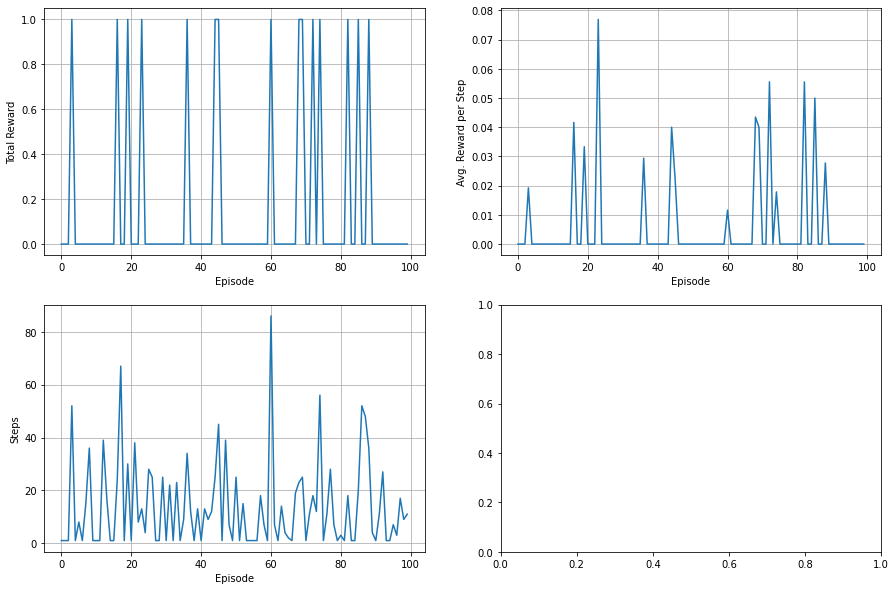

In [14]:
plotStats(vi_lengths, vi_rewards)

## Policy Iteration

0.95 0.13
0.96 0.128
0.97 0.126
0.98 0.148
0.99 0.162


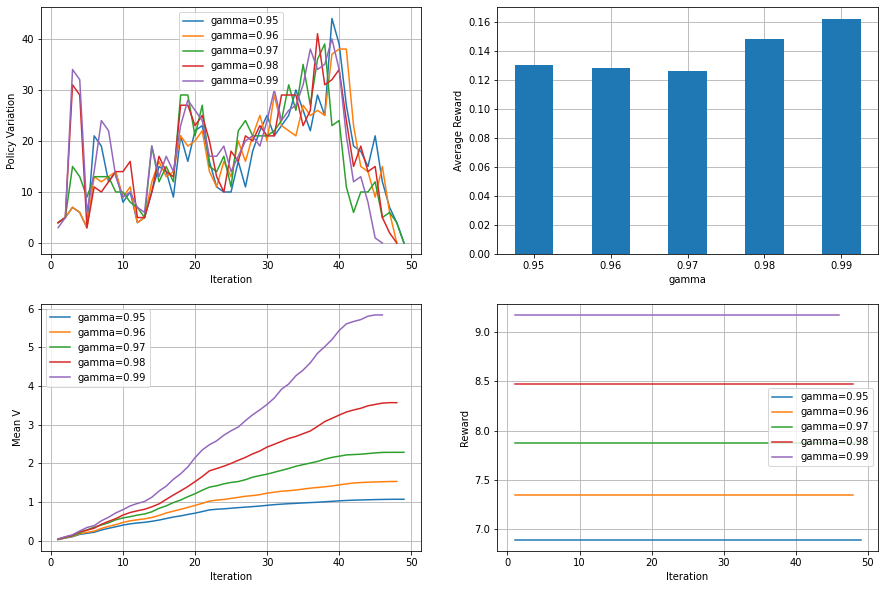

In [15]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))
avg_rewards = []
for gamma in gammas:
    pi = mdp.PolicyIteration(T, R, gamma)
    pi.run()
    episodes = 500
    x = range(episodes)
    pi_lengths, pi_rewards = simulateGymEnv(env, pi.policy, episodes)
    print(gamma, sum(pi_rewards) / episodes)
    avg_rewards.append(sum(pi_rewards) / episodes)
    
    # Policy change per iteration
    ax[0][0].plot(range(1, pi.iter + 1), pi.variation, label="gamma=%.2f" % gamma)
    ax[0][0].set_xlabel('Iteration')
    ax[0][0].set_ylabel('Policy Variation')
    ax[0][0].grid()
    ax[0][0].legend()
    
    ax[1][0].plot(range(1, pi.iter + 1), [run['Mean V'] for run in pi.run_stats], label="gamma=%.2f" % gamma)
    ax[1][0].set_xlabel('Iteration')
    ax[1][0].set_ylabel('Mean V')
    ax[1][0].grid()
    ax[1][0].legend()
    
    ax[1][1].plot(range(1, pi.iter + 1), [run['Reward'] for run in pi.run_stats], label="gamma=%.2f" % gamma)
    ax[1][1].set_xlabel('Iteration')
    ax[1][1].set_ylabel('Reward')
    ax[1][1].grid()
    ax[1][1].legend()
    
# Time
ax[0][1].bar(gammas, avg_rewards, width=0.005)
ax[0][1].set_xlabel('gamma')
ax[0][1].set_ylabel('Average Reward')
ax[0][1].set_axisbelow(True)
ax[0][1].grid()

plt.show()

In [16]:
pi = mdp.PolicyIteration(T, R, 0.99)
pi.run()
print(pi.iter, pi.time)

46 0.6589782238006592


In [17]:
episodes = 100
x = range(episodes)

pi_lengths, pi_rewards = simulateGymEnv(env, pi.policy, episodes)

In [18]:
print(pi.policy)

(0, 1, 5, 3, 4, 1, 0, 3, 2, 4, 3, 5, 2, 1, 2, 0, 3, 0, 4, 1, 5, 1, 0, 4, 5, 5, 2, 3, 4, 1, 2, 5, 2, 0, 4, 0, 3, 4, 5, 3, 2, 4, 5, 1, 0, 4, 0, 3, 0, 5, 2, 1, 5, 1, 2, 1, 5, 0, 3, 3, 4, 0, 4, 3, 4, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 3, 2, 1, 2, 3, 2, 4, 3, 5, 2, 1, 2, 0, 3, 0, 4, 4, 5, 1, 0, 4, 5, 3, 2, 3, 0, 4, 0, 1, 2, 1, 5, 5, 2, 1, 5, 0, 4, 3, 4, 0, 3, 3, 4, 4, 5, 5, 2, 1, 2, 3, 2, 1, 5, 1, 0, 1, 2, 3, 2, 0, 3, 0, 4, 1, 5, 1, 2, 1, 5, 5, 2, 3, 4, 0, 4, 3, 4, 0, 3, 1, 0, 3, 2, 4, 5, 3, 2, 1, 0, 3, 2, 4, 5, 1, 0, 4, 3, 4, 0, 4, 3, 3, 0, 5, 2, 1, 2, 5, 2, 1, 5, 5, 2, 1, 2, 1, 2, 1, 5, 0, 3, 0, 4, 0, 3, 3, 4, 0, 3, 0, 4, 0, 4, 3, 4, 1, 5, 1, 0, 4, 5, 5, 2, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 1, 0, 4, 5, 5, 2, 4, 5, 5, 2, 1, 2, 3, 2, 3, 2, 1, 2, 5, 2, 0, 4, 0, 3, 4, 5, 3, 2, 4, 5, 1, 0, 4, 0, 3, 0, 5, 2, 1, 5, 1, 2, 1, 5, 0, 3, 3, 4, 0, 4, 3, 4, 1, 5, 1, 0, 1, 2, 3, 2, 4, 5, 5, 2, 1, 2, 3, 2, 0, 4, 0, 3, 1, 5, 5, 2, 1, 5, 1, 2, 3, 4, 0, 3, 3, 4, 0, 4, 1, 0, 3, 2, 4, 5, 1, 0, 1, 0, 3, 2, 4, 5, 3, 2, 

0.14


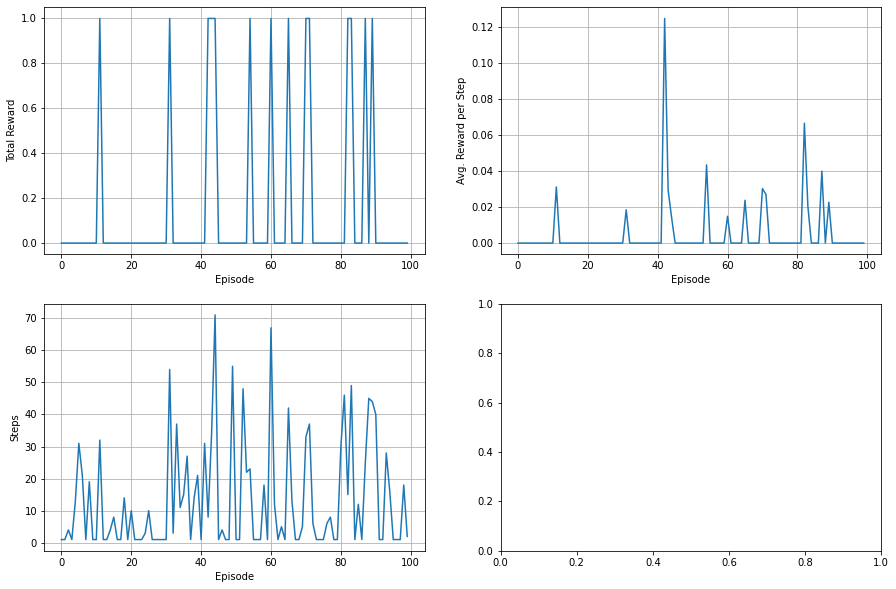

In [19]:
plotStats(pi_lengths, pi_rewards)

In [20]:
# epsilons = np.geomspace(0.01, 0.99, 5)
# print(epsilons)
# alphas = np.geomspace(0.001, 0.9, 10)
# print(alphas)
# decays = np.geomspace(0.99, 0.9999999, 10)
# print(decays)

# total = len(epsilons) * len(alphas) * len(decays) * len(gammas)
# print(total)

# params = []
# for gamma in gammas:
#     for alpha in alphas:
#         for decay in decays:
#             for epsilon in epsilons:
#                 params.append((gamma, alpha, decay, epsilon))
# print(len(params))

alphas = [0.1, 0.01, 0.001]
params = []
for alpha in alphas:
    params.append((0.99, alpha, 0.999999, 0.95))
print(len(params))

3


In [21]:
def runQLearning(params):
    gamma, alpha, decay, epsilon = params
    q = mdp.QLearning(T, R, gamma, n_iter=100000000, 
                      epsilon=epsilon, epsilon_decay=decay,
                      alpha=alpha, alpha_decay=decay,
                      run_stat_frequency=1000000)
    q.run()
    return (q, {'gamma': gamma, 'alpha': alpha, 'epsilon': epsilon, 'decay': decay})

In [22]:
from multiprocessing import Pool

try:
    pool = Pool()
    q_policies = pool.map(runQLearning, params)
finally:
    pool.close()
    pool.join()

In [25]:
q_policies = [i for i in q_policies]

In [34]:
import pickle as pkl
import joblib as jb

In [38]:
np.save("q_policies",q_policies)

In [37]:
# jb.dump("q_policies.pkl",q_policies)

In [28]:
policy[0]

P: 
array([[0.1, 0.9, 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9]])
array([[0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])
array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0.1]])
array([[0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. 

In [29]:
max_reward = 0
best_policy = []
episodes = 100
x = range(episodes)
for policy in tqdm(q_policies):
    q_lengths, q_rewards = simulateGymEnv(env, policy[0].policy, episodes, max_iters=1000)
    reward = sum(q_rewards)
    if reward > max_reward:
        max_reward = reward
        best_policy = [policy]
    elif reward == max_reward:
        best_policy.append(policy)

100%|██████████| 3/3 [00:00<00:00,  9.21it/s]


In [32]:
print(q_rewards)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [30]:
print(max_reward, best_policy)

0 [array([P: 
array([[0.1, 0.9, 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9]])
array([[0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])
array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0.1]])
array([[0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. 

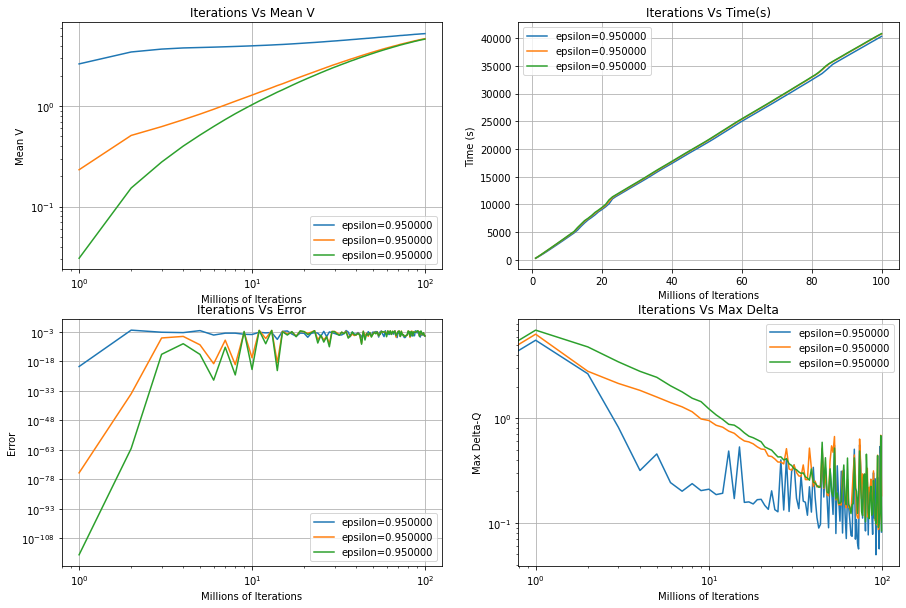

In [38]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))
for q in q_policies:
    epsilon = q[1]['epsilon']
    q = q[0]
    stat_iters = len(q.run_stats)
    q_mean_v = [stats['Mean V'] for stats in q.run_stats]
    q_error = [stats['Error'] for stats in q.run_stats]
    q_time = [stats['Time'] for stats in q.run_stats]

    # mean v per iteration
    ax[0][0].loglog(range(1, stat_iters + 1), q_mean_v, label="epsilon=%f" % epsilon)
    ax[0][0].set_xlabel('Millions of Iterations')
    ax[0][0].set_ylabel('Mean V')
    ax[0][0].title.set_text('Iterations Vs Mean V')
    ax[0][0].grid()
    ax[0][0].legend()
    # Time
    ax[0][1].plot(range(1, stat_iters + 1), q_time, label="epsilon=%f" % epsilon)
    ax[0][1].set_xlabel('Millions of Iterations')
    ax[0][1].set_ylabel('Time (s)')
    ax[0][1].title.set_text('Iterations Vs Time(s)')
    ax[0][1].grid()
    ax[0][1].legend()

    ax[1][0].loglog(range(1, stat_iters + 1), q_error, label="epsilon=%f" % epsilon)
    ax[1][0].set_xlabel('Millions of Iterations')
    ax[1][0].set_ylabel('Error')
    ax[1][0].title.set_text('Iterations Vs Error')
    
    ax[1][0].grid()
    ax[1][0].legend()

    ax[1][1].loglog(range(len(q.variation)), q.variation, label="epsilon=%f" % epsilon)
    ax[1][1].set_xlabel('Millions of Iterations')
    ax[1][1].set_ylabel('Max Delta-Q')
    ax[1][1].title.set_text('Iterations Vs Max Delta')
    
    ax[1][1].grid()
    ax[1][1].legend()

plt.show()

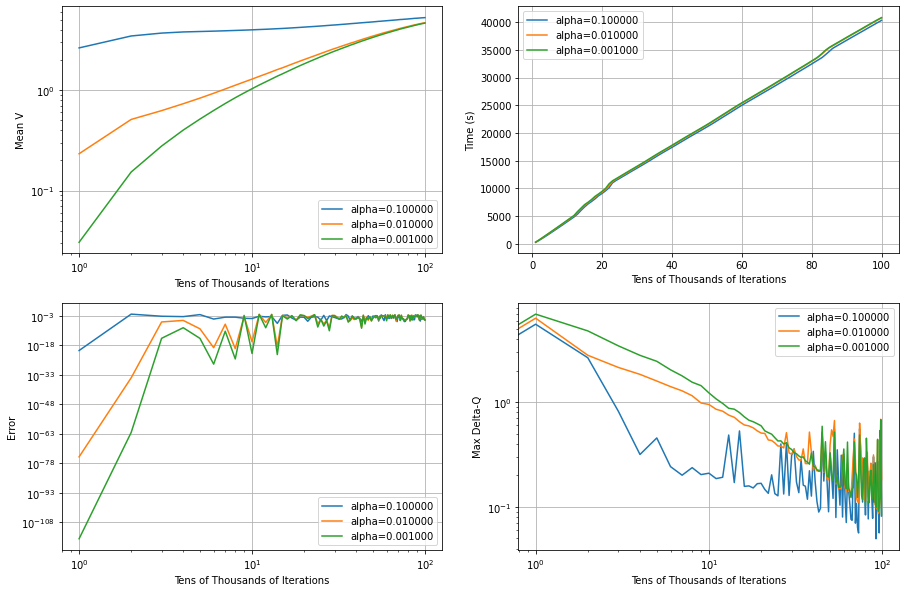

In [37]:
_, ax = plt.subplots(2, 2, figsize=(15, 10))
for q in q_policies:
    alpha = q[1]['alpha']
    q = q[0]
    stat_iters = len(q.run_stats)
    q_mean_v = [stats['Mean V'] for stats in q.run_stats]
    q_error = [stats['Error'] for stats in q.run_stats]
    q_time = [stats['Time'] for stats in q.run_stats]

    # mean v per iteration
    ax[0][0].loglog(range(1, stat_iters + 1), q_mean_v, label="alpha=%f" % alpha)
    ax[0][0].set_xlabel('Tens of Thousands of Iterations')
    ax[0][0].set_ylabel('Mean V')
    ax[0][0].grid()
    ax[0][0].legend()
    # Time
    ax[0][1].plot(range(1, stat_iters + 1), q_time, label="alpha=%f" % alpha)
    ax[0][1].set_xlabel('Tens of Thousands of Iterations')
    ax[0][1].set_ylabel('Time (s)')
    ax[0][1].grid()
    ax[0][1].legend()

    ax[1][0].loglog(range(1, stat_iters + 1), q_error, label="alpha=%f" % alpha)
    ax[1][0].set_xlabel('Tens of Thousands of Iterations')
    ax[1][0].set_ylabel('Error')
    ax[1][0].grid()
    ax[1][0].legend()

    ax[1][1].loglog(range(len(q.variation)), q.variation, label="alpha=%f" % alpha)
    ax[1][1].set_xlabel('Tens of Thousands of Iterations')
    ax[1][1].set_ylabel('Max Delta-Q')
    ax[1][1].grid()
    ax[1][1].legend()

plt.show()

In [13]:
q_policies=np.load("q_policies.npy",allow_pickle=True)

In [14]:
q_policies

array([[P: 
array([[0.1, 0.9, 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.1, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.9, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9],
       [0. , 0. , 0. , ..., 0. , 0.1, 0.9]])
array([[0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])
array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0. ],
       [0. , 0. , 0. , ..., 0. , 0.9, 0.1]])
array([[0.9, 0.1, 0. , ..., 0. , 0. , 0. ],
       [0.1, 0. , 0.9, ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 

In [36]:
len(q_policies)

3

In [35]:
# q_optimal = mdp.QLearning(T, R, 0.99, n_iter=2000000,
#                           epsilon=0.95,
#                           epsilon_decay=0.999999,
#                           alpha=0.1,
#                           alpha_decay=1.0,
#                           run_stat_frequency=10000)
# q_optimal.run()

q_optimal = q_policies[2][0]
print(q_optimal.policy)
print(q_policies[0][1])

(0, 1, 5, 3, 4, 1, 0, 3, 1, 4, 3, 5, 2, 1, 2, 0, 3, 0, 4, 1, 5, 1, 0, 4, 5, 5, 2, 3, 2, 1, 2, 1, 3, 0, 4, 0, 1, 4, 5, 3, 2, 4, 5, 0, 0, 4, 0, 3, 0, 5, 2, 1, 5, 1, 2, 1, 5, 0, 3, 3, 4, 0, 4, 3, 5, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 3, 2, 1, 2, 3, 3, 4, 3, 5, 2, 1, 2, 0, 1, 0, 4, 4, 5, 1, 0, 4, 5, 3, 2, 3, 3, 4, 0, 1, 2, 1, 4, 5, 2, 1, 5, 0, 4, 3, 4, 0, 3, 3, 4, 4, 5, 5, 2, 1, 2, 3, 4, 1, 5, 1, 0, 1, 2, 3, 2, 0, 3, 0, 4, 1, 5, 1, 2, 1, 5, 5, 2, 3, 2, 0, 4, 3, 4, 0, 3, 1, 0, 3, 2, 4, 2, 3, 2, 1, 0, 3, 2, 4, 5, 1, 0, 4, 3, 4, 0, 4, 3, 3, 0, 5, 2, 1, 2, 5, 4, 1, 5, 5, 2, 1, 2, 1, 2, 1, 5, 0, 3, 0, 4, 0, 3, 3, 4, 0, 3, 0, 4, 0, 4, 3, 4, 1, 5, 1, 0, 4, 5, 5, 2, 1, 5, 1, 0, 1, 0, 3, 2, 4, 5, 1, 0, 4, 5, 5, 2, 4, 5, 5, 2, 1, 2, 3, 2, 3, 2, 1, 2, 1, 3, 5, 4, 3, 1, 4, 5, 3, 2, 4, 4, 0, 5, 0, 0, 3, 3, 5, 2, 1, 5, 1, 2, 1, 0, 0, 2, 3, 2, 0, 4, 3, 5, 1, 5, 1, 0, 1, 2, 3, 2, 4, 5, 5, 2, 1, 2, 0, 4, 5, 4, 1, 3, 1, 4, 5, 2, 1, 0, 1, 2, 3, 4, 0, 1, 3, 5, 0, 4, 1, 0, 3, 2, 4, 5, 1, 0, 1, 0, 0, 1, 4, 5, 3, 2, 

In [19]:
episodes = 500
x = range(episodes)

q_lengths, q_rewards = simulateGymEnv(env, q_optimal.policy, episodes, max_iters=1000)

In [23]:
q_optimal.policy

(0,
 1,
 5,
 3,
 4,
 1,
 0,
 3,
 1,
 4,
 3,
 5,
 2,
 1,
 2,
 0,
 3,
 0,
 4,
 1,
 5,
 1,
 0,
 4,
 5,
 5,
 2,
 3,
 2,
 1,
 2,
 1,
 3,
 0,
 4,
 0,
 1,
 4,
 5,
 3,
 2,
 4,
 5,
 0,
 0,
 4,
 0,
 3,
 0,
 5,
 2,
 1,
 5,
 1,
 2,
 1,
 5,
 0,
 3,
 3,
 4,
 0,
 4,
 3,
 5,
 1,
 5,
 1,
 0,
 1,
 0,
 3,
 2,
 4,
 5,
 3,
 2,
 1,
 2,
 3,
 3,
 4,
 3,
 5,
 2,
 1,
 2,
 0,
 1,
 0,
 4,
 4,
 5,
 1,
 0,
 4,
 5,
 3,
 2,
 3,
 3,
 4,
 0,
 1,
 2,
 1,
 4,
 5,
 2,
 1,
 5,
 0,
 4,
 3,
 4,
 0,
 3,
 3,
 4,
 4,
 5,
 5,
 2,
 1,
 2,
 3,
 4,
 1,
 5,
 1,
 0,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 4,
 1,
 5,
 1,
 2,
 1,
 5,
 5,
 2,
 3,
 2,
 0,
 4,
 3,
 4,
 0,
 3,
 1,
 0,
 3,
 2,
 4,
 2,
 3,
 2,
 1,
 0,
 3,
 2,
 4,
 5,
 1,
 0,
 4,
 3,
 4,
 0,
 4,
 3,
 3,
 0,
 5,
 2,
 1,
 2,
 5,
 4,
 1,
 5,
 5,
 2,
 1,
 2,
 1,
 2,
 1,
 5,
 0,
 3,
 0,
 4,
 0,
 3,
 3,
 4,
 0,
 3,
 0,
 4,
 0,
 4,
 3,
 4,
 1,
 5,
 1,
 0,
 4,
 5,
 5,
 2,
 1,
 5,
 1,
 0,
 1,
 0,
 3,
 2,
 4,
 5,
 1,
 0,
 4,
 5,
 5,
 2,
 4,
 5,
 5,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 2,
 1,
 3,
 5,


0.0


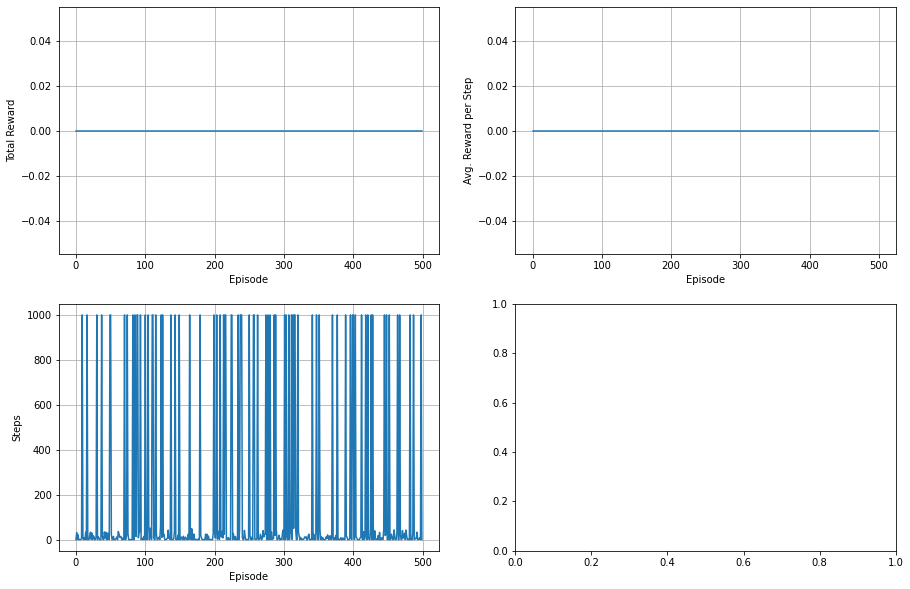

In [20]:
plotStats(q_lengths, q_rewards)

In [18]:
print(q_optimal.time)

40792.192543029785
